<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

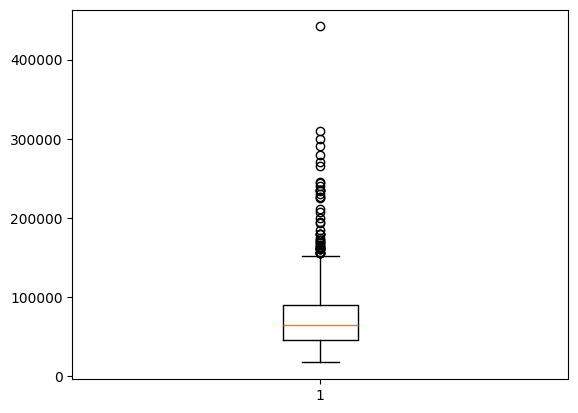

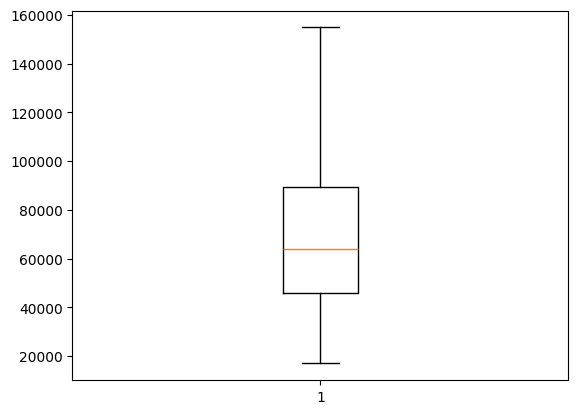

Text(0.5, 1.0, 'Sebelum Standarisasi')

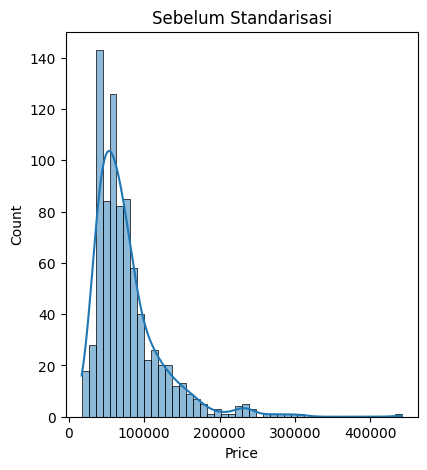

In [5]:
#model regresion pediksi harga leptop

import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#data loading
data_model = pd.read_csv('laptopPrice (1).csv')
data_model.info()
data_model.describe(include='all')

#PREPROCESSING
#data cleaning
cleanig = data_model.drop_duplicates().copy()#saya menambahkan fungsi copy() untuk menghindari SettingWithCopyWarning pada pandas
cleanig.duplicated().sum()

#outliers detector and otliers handling pada kolom harga dengan metode IQR
import matplotlib.pyplot as plt
Q1 = cleanig['Price'].quantile(0.25)
Q3 = cleanig['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_data = Q1 - 1.5 * IQR
upper_data = Q3 + 1.5 * IQR

lihat_outliers = cleanig[(
    cleanig['Price'] < lower_data) |
    (cleanig['Price'] > upper_data
)]

lihat_outliers
plt.boxplot(cleanig['Price'])
plt.show()


#melakukan treatment outliers dengan metode clipping
cleanig['Price'] = cleanig['Price'].clip(lower_data, upper_data).copy()
plt.boxplot(cleanig['Price'])
plt.show()

#stadardisasi data
scaler = StandardScaler()
cleanig['Price'] = scaler.fit_transform(cleanig[['Price']])

#melihat data sebelum srandarisasi
plt.figure(figsize=(10,5)) #menentukan grafik berukuran 10x5
plt.subplot(1,2,1) #`membuat 1 baris 2 kolom, dan memilih grafik pertama`
sns.histplot(data_model['Price'], kde=True) #membuat histogram dengan data asli
plt.title('Sebelum Standarisasi') #memberi judul grafik